## Heat equatation

Equatation
$$\begin{cases}
    U_{t} = a^2 \Delta U, x \in (0, \pi), y \in (0, \pi), t \in (0, +\infty)\\
    U(x,y,0) = \sum\limits_{i,j=1}^{N_{max},M_{max}} C_{ji} sin(ix) sin(jy) \\
    U(0,0,t) = U(0,\pi,t) = U(\pi,0,t) = U(\pi,\pi,t) = 0, t \in [0, +\infty)
\end{cases}$$

Solution
    $$ U(x,y,t) = \sum\limits_{i,j=1}^{N_{max},M_{max}} C_{ji} sin(ix) sin(jy) exp\{-a^2(i^2+j^2)t\} $$

In [42]:
import numpy as np

def remove_keys(d, keys):
    r = dict(d)
    for key in keys:
        del r[key]
    
    return r

def heat_eq(init_params, t):
    C = init_params['C']
    params = remove_keys(init_params, ['C'])
    return heat_eq_(C, t, **params)[1]

def heat_eq_(C, t, a=1, N=64):
    x, y, = np.linspace(0, np.pi, N), np.linspace(0, np.pi, N)
    x, y = np.meshgrid(x, y)
    J, I = coef.shape

    phi, sol = np.zeros_like(x), np.zeros_like(x)
    for j in range(1, J + 1):
        for i in range(1, I + 1):
            exp_factor = - a ** 2 * (j ** 2 + i ** 2) * t
            X = np.sin(i * x) * np.sin(j * y)
            phi += C[j - 1 , i - 1] * X
            sol += C[j - 1 , i - 1] * X * np.exp(exp_factor)

    return phi, sol

## Visualization

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation


def animate_equatation(equatation, init_params, t_in, t_out, range_, num_steps=20):
    fig, ax = plt.subplots()
    vmin, vmax = range_
    
    def animate(t):
        sol = equatation(init_params, t)
        im = ax.imshow(sol, vmin=vmin, vmax=vmax)
        return im

    animation = matplotlib.animation.FuncAnimation(fig, 
        animate, 
        frames=np.linspace(t_in, t_out, num_steps),
        interval=200,
        repeat=True)
    
    return animation

def compare_solutions(u1, u2, range_):
    fig, ax = plt.subplots(1, 2)
    vmin, vmax = range_
    
    def animate(t):
        ax[0].imshow(u1[t], vmin=vmin, vmax=vmax)
        ax[1].imshow(u2[t], vmin=vmin, vmax=vmax)
        return fig

    animation = matplotlib.animation.FuncAnimation(fig, 
        animate, 
        frames=np.arange(u1.shape[0]),
        interval=200,
        repeat=True)
    
    return animation

In [52]:
# example
coef = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 1],
])
init_params = {'C': coef, 'a': 0.01}

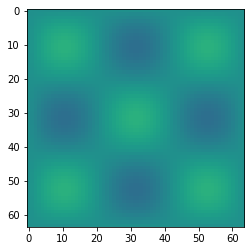

In [54]:
animate_solution(heat_eq, init_params, 0, 2000, [-0.1, 0.1])

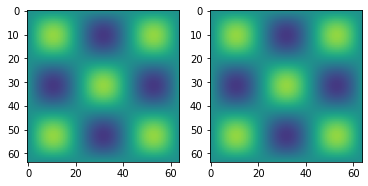

In [65]:
sol = np.empty((4, 64, 64))
for j, i in enumerate(range(0, 2000, 500)):
    sol[j] = heat_eq(init_params, i)
    
compare_solutions(sol, sol, [-0.1, 0.1])